First 5 rows:
  rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get be

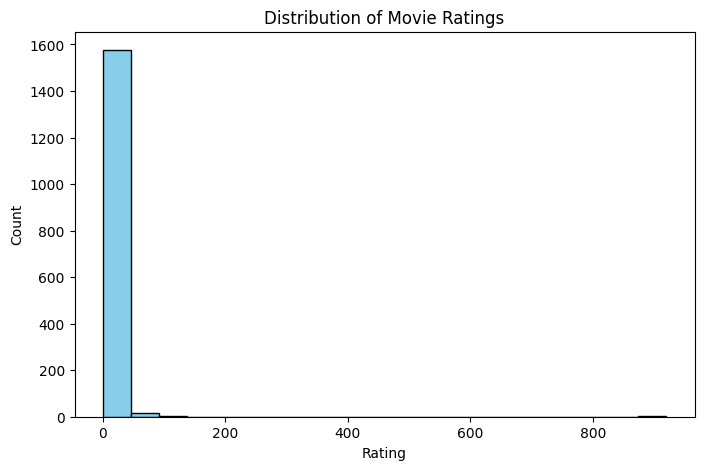

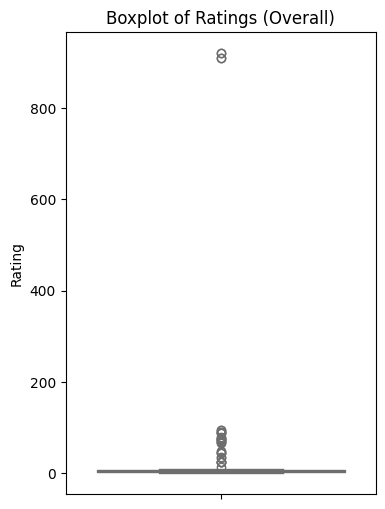

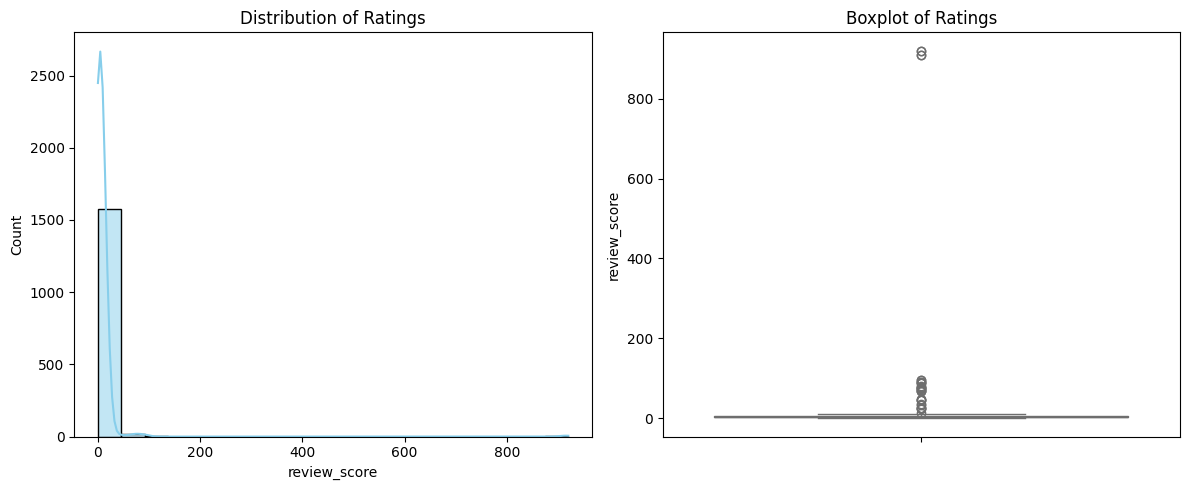

In [1]:
# Project 3: Analyzing and Visualizing Movie Ratings
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("rotten_tomatoes_critic_reviews.csv")
print("First 5 rows:")
print(df.head(), "\n")
print("Dataset Info:")
print(df.info(), "\n")
print("Columns in Dataset:", df.columns.tolist(), "\n")

#Identify Rating Column 
# Common possible names for ratings
possible_rating_cols = ['rating', 'review_score', 'ratingvalue', 'critic_rating', 'review_rating']
rating_col = None
for col in df.columns:
    if col.lower() in possible_rating_cols:
        rating_col = col
        break
if rating_col is None:
    raise ValueError("No rating column found. Please check dataset column names.")
print(f"Using rating column: {rating_col}\n")

# Data Cleaning & Preprocessing
df = df.dropna(subset=[rating_col])
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
df = df.dropna(subset=[rating_col])

# Summary Statistics
mean_rating = df[rating_col].mean()
median_rating = df[rating_col].median()
mode_rating = df[rating_col].mode()[0]
print("Summary Statistics:")
print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating:.2f}")
print(f"Mode: {mode_rating}\n")
print("Descriptive Stats:")
print(df[rating_col].describe(), "\n")

#Visualizations - Histogram
plt.figure(figsize=(8,5))
plt.hist(df[rating_col], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Fixed Boxplots
# Overall Ratings
plt.figure(figsize=(4,6))
sns.boxplot(y=df[rating_col], color="lightcoral")
plt.title("Boxplot of Ratings (Overall)")
plt.ylabel("Rating")
plt.show()

# Ratings by Genre
if 'genre' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='genre', y=rating_col, data=df)
    plt.title("Boxplot of Ratings by Genre")
    plt.xticks(rotation=45)
    plt.show()

# Ratings by Top 10 Movies
if 'movie_title' in df.columns:
    top10_movies = df['movie_title'].value_counts().head(10).index
    plt.figure(figsize=(10,6))
    sns.boxplot(x='movie_title', y=rating_col, data=df[df['movie_title'].isin(top10_movies)])
    plt.title("Boxplot of Ratings for Top 10 Movies")
    plt.xticks(rotation=45)
    plt.show()

#Top-Rated Movies
if 'movie_title' in df.columns:
    top_movies = df.groupby('movie_title')[rating_col].mean().sort_values(ascending=False).head(10)
    print("Top 10 Movies by Average Rating:")
    print(top_movies, "\n")

    plt.figure(figsize=(10,5))
    top_movies.plot(kind='bar', color='seagreen')
    plt.title("Top 10 Movies by Average Rating")
    plt.ylabel("Average Rating")
    plt.show()

#Top-Rated Genres
if 'genre' in df.columns:
    top_genres = df.groupby('genre')[rating_col].mean().sort_values(ascending=False).head(10)
    print("Top 10 Genres by Average Rating:")
    print(top_genres, "\n")

    plt.figure(figsize=(10,5))
    top_genres.plot(kind='bar', color='orange')
    plt.title("Top 10 Genres by Average Rating")
    plt.ylabel("Average Rating")
    plt.show()

#Dashboard-like Summary (Multiple Plots)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df[rating_col], bins=20, kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Distribution of Ratings")

# Boxplot (Overall)
sns.boxplot(y=df[rating_col], ax=axs[1], color="lightcoral")
axs[1].set_title("Boxplot of Ratings")

plt.tight_layout()
plt.show()
